In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/sample_data/Facebook Spam Dataset.csv')

data.head()


,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907,200,1000,850,922,0.490000,0.550000,0.56,0.47,40,14,1
1,2,150,350,30,300,300,100,290,0.330000,0.960000,0.50,1.20,10,4,0
2,3,300,450,50,465,500,150,450,0.200000,0.840000,0.40,1.50,15,7,0
3,4,25,110,660,350,2050,2000,2050,0.975610,1.000000,0.70,0.30,54,21,1
4,5,24,100,150,800,950,1000,900,1.052632,0.947368,0.66,0.50,55,20,1


In [6]:
# Data Dictionary
data_dict = {
    "profile id": "Unique identifier for each profile",
    "#friends": "Number of friends",
    "#following": "Number of followings",
    "#community": "Number of communities",
    "age": "Age of the user account (in days)",
    "#postshared": "Total number of posts shared",
    "#urlshared": "Total number of URLs shared",
    "#photos/videos": "Total number of photos/videos shared",
    "fpurls": "Fraction of posts containing URLs",
    "fpphotos/videos": "Fraction of posts containing photos/videos",
    "avgcomment/post": "Average number of comments per post",
    "likes/post": "Average number of likes per post",
    "tags/post": "Average number of tags in a post",
    "#tags/post": "Average number of hashtags present in a post",
    "Label": "0 for legit, 1 for spam"
}

# Variable categorization
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric Features: {len(numeric_features)}")
print(f"Categorical Features: {len(categorical_features)}")


Numeric Features: 15
Categorical Features: 0


Dataset Shape: (600, 15)

Data Types:
 profile id           int64
#friends             int64
#following           int64
#community           int64
age                  int64
#postshared          int64
#urlshared           int64
#photos/videos       int64
fpurls             float64
fpphotos/videos    float64
avgcomment/post    float64
likes/post         float64
tags/post            int64
#tags/post           int64
Label                int64
dtype: object

Missing Values:
 profile id         0
#friends           0
#following         0
#community         0
age                0
#postshared        0
#urlshared         0
#photos/videos     0
fpurls             2
fpphotos/videos    0
avgcomment/post    0
likes/post         0
tags/post          0
#tags/post         0
Label              0
dtype: int64

Basic Statistics:
        profile id     #friends   #following   #community          age  \
count  600.000000   600.000000   600.000000   600.000000   600.000000   
mean   301.175000  1066.355000

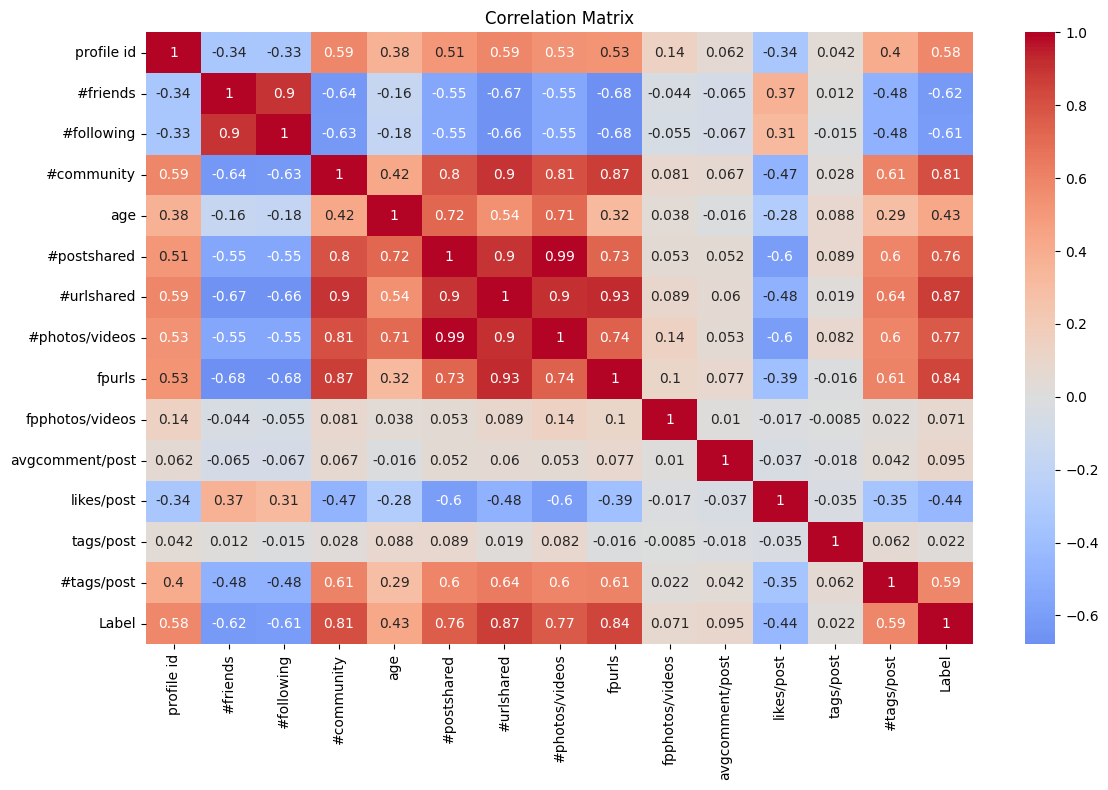

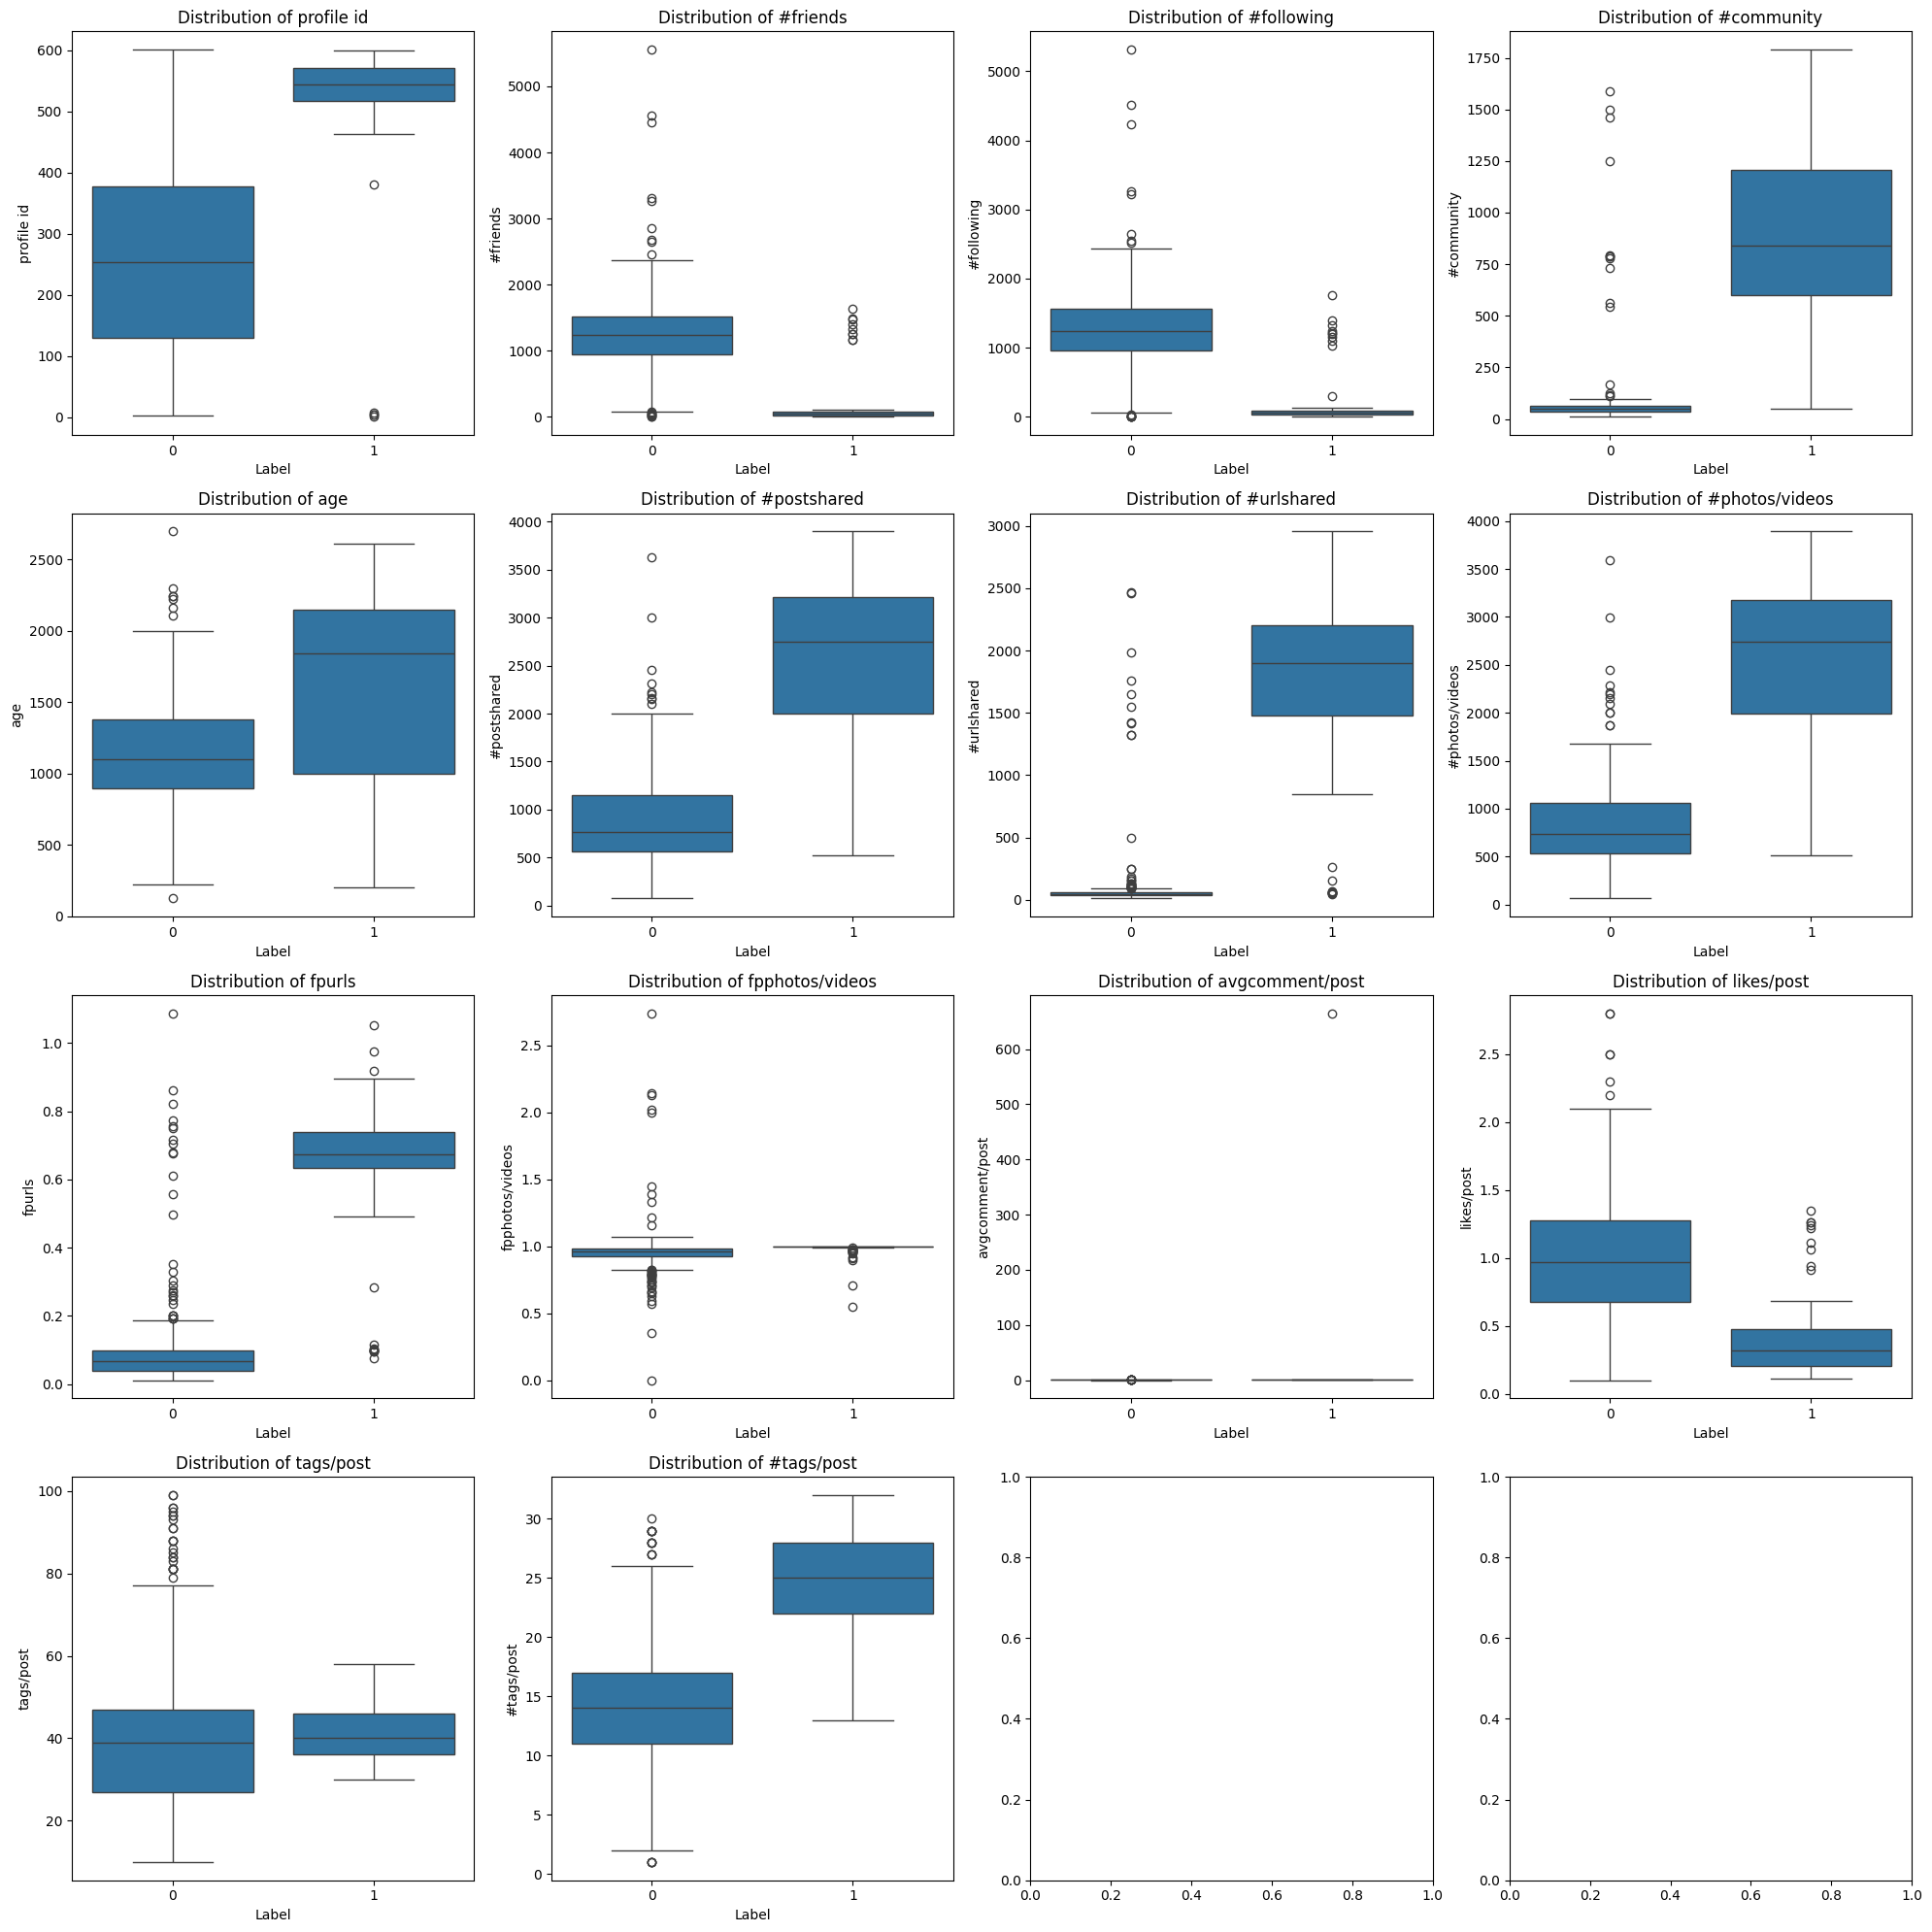

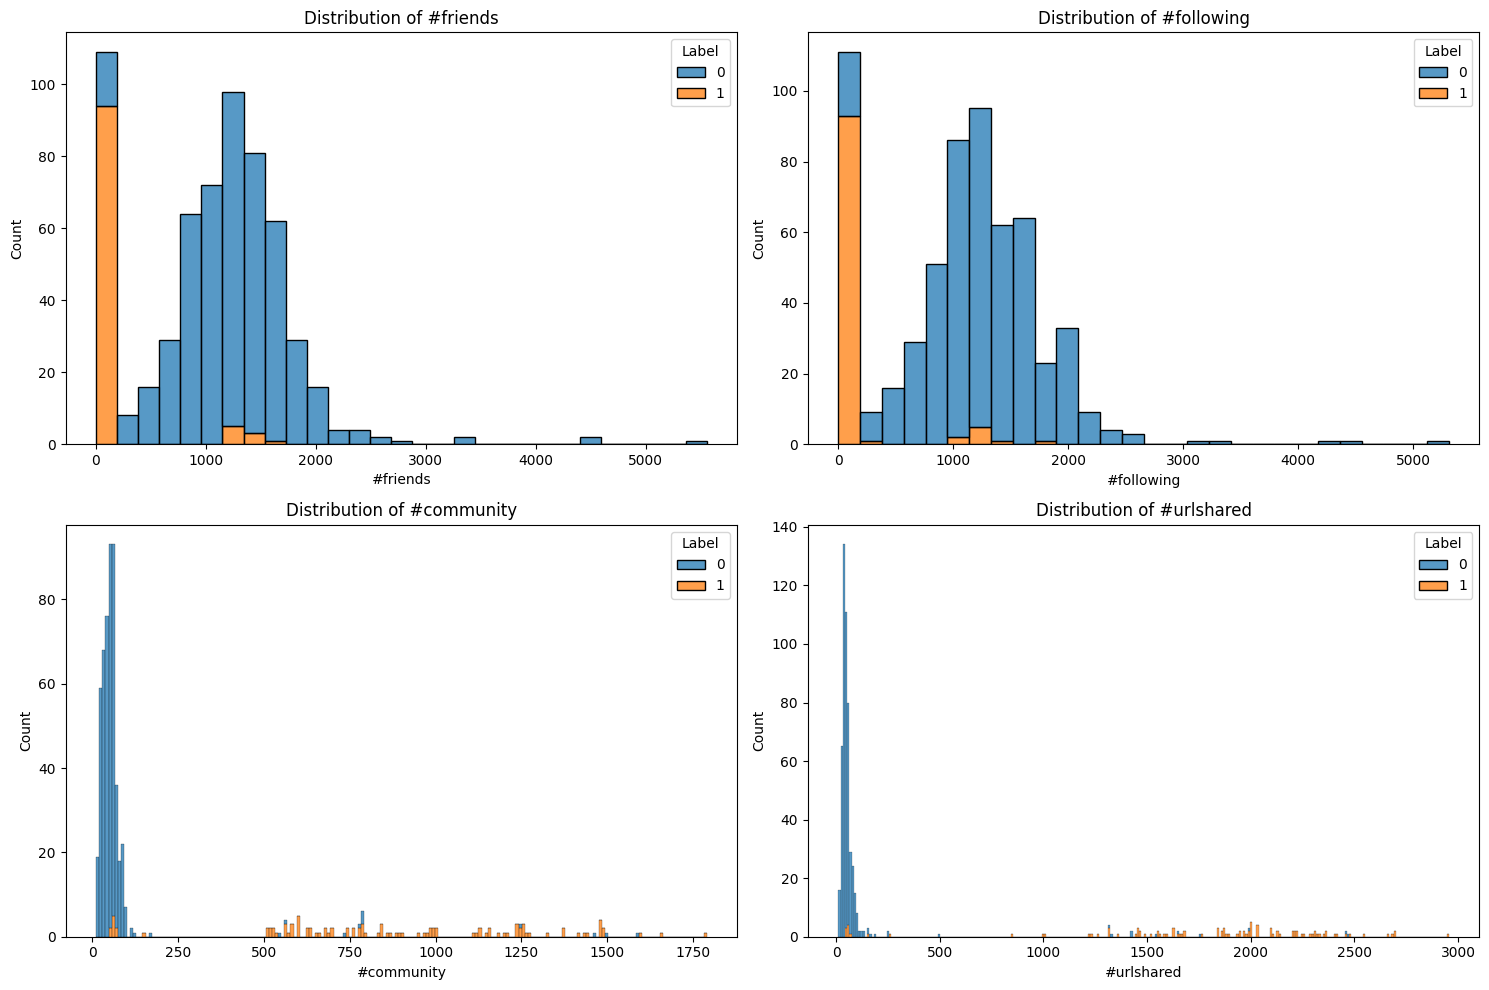

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
df = pd.read_csv('/content/sample_data/Facebook Spam Dataset.csv')

# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Display basic statistics
print("\nBasic Statistics:\n", df.describe())

# Check class distribution
print("\nClass Distribution:")
print(df['Label'].value_counts(normalize=True))

# Create correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Box plots for numerical features to check for outliers
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
features_to_plot = [col for col in numerical_features if col != 'Label']

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel()

for idx, col in enumerate(features_to_plot):
    if idx < len(axes):
        sns.boxplot(x='Label', y=col, data=df, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Distribution plots for key features
plt.figure(figsize=(15, 10))
for i, column in enumerate(['#friends', '#following', '#community', '#urlshared'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, hue='Label', multiple="stack")
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

1.   Class distribution is imbalanced: 82.83% legitimate (0) vs 17.17% spam (1).
2.   Correlation: Strong positive for friends and #following (0.9), postshared and photos/videos (0.99), urlshared and fpurls (0.93). And Strong negative for #friends and #community (-0.64),#following and #community (-0.63).

3.   Box Plots:

      *   #friends: Spam accounts have significantly lower friend counts

      *   #following: Spam accounts follow fewer people

      *   #community: Spam accounts show higher community engagement

      *   Age: Spam accounts tend to be older profiles
      *   #postshared: Spam accounts show higher posting frequency
      *   #urlshared: Spam accounts share significantly more URLs
      *   #photos/videos: Spam accounts post more media content
      *   likes/post: Spam accounts receive fewer likes per post


4.   Distribution plots
  *   #friends: Genuine profiles tend to have a higher number of friends compared to fake profiles

  *   #following: genuine profiles tend to follow more accounts compared to fake profiles.

  *   #community: genuine profiles tend to follow less community.

  *   #urlshared: Genuine profiles tend to share less URLs compared to fake profiles.










In [8]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import boxcox
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/Facebook Spam Dataset.csv')

# Separate features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Handle Missing Values (Imputation)
imputer = SimpleImputer(strategy='mean')  # Use mean imputation for 'fpurls'
X['fpurls'] = imputer.fit_transform(X[['fpurls']])

# Handle Outliers (using IQR)
def handle_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  return df

for col in X.select_dtypes(include=['int64', 'float64']).columns:
  X = handle_outliers(X, col)

# Feature Transformation (Log Transformation= gaussian)
for col in ['#friends', '#community', '#postshared', '#urlshared', '#photos/videos',
            'avgcomment/post', 'likes/post', 'tags/post', '#tags/post']:
  X[col] = np.log1p(X[col])

# Feature Selection (Select '#friends' over '#following')
X = X.drop('#following', axis=1)

# Handle Class Imbalance (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale the  data
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Split data into training and testing sets (stratified split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled,
                                                    test_size=0.2, stratify=y_resampled, random_state=42)

# Print the shape of the transformed data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (795, 13)
Shape of X_test: (199, 13)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probability scores for AUC calculation

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC": auc
    }

    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("-" * 20)

# Select best model
best_model_name = max(results, key=lambda x: results[x]["F1-score"])
print(f"Best Model: {best_model_name}")

Logistic Regression Results:
Accuracy: 0.9497
Precision: 0.9684
Recall: 0.9293
F1-score: 0.9485
AUC: 0.9891
--------------------
SVM Results:
Accuracy: 0.9497
Precision: 0.9684
Recall: 0.9293
F1-score: 0.9485
AUC: 0.9813
--------------------
Random Forest Results:
Accuracy: 0.9648
Precision: 0.9694
Recall: 0.9596
F1-score: 0.9645
AUC: 0.9891
--------------------
XGBoost Results:
Accuracy: 0.9598
Precision: 0.9691
Recall: 0.9495
F1-score: 0.9592
AUC: 0.9909
--------------------
Best Model: Random Forest


In [11]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                          cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\nEvaluation Metrics after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Evaluation Metrics after Hyperparameter Tuning:
Accuracy: 0.9648
Precision: 0.9694
Recall: 0.9596
F1-score: 0.9645
AUC: 0.9902


Feature Importances:
            Feature  Importance
1          #friends    0.214783
0        profile id    0.211008
2        #community    0.150106
5        #urlshared    0.118334
7            fpurls    0.108498
6    #photos/videos    0.056329
4       #postshared    0.039054
9   avgcomment/post    0.027679
12       #tags/post    0.026231
10       likes/post    0.014326
11        tags/post    0.012981
3               age    0.010803
8   fpphotos/videos    0.009867


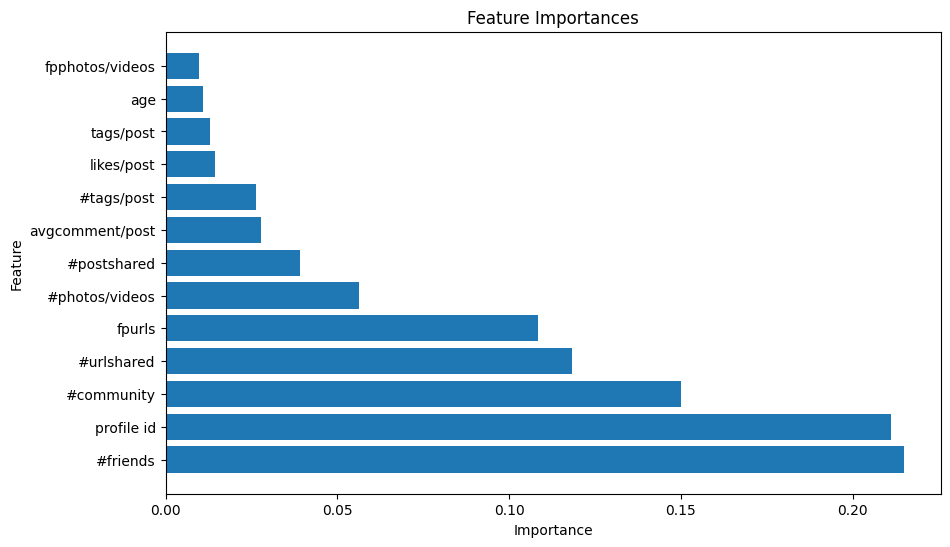

In [12]:
# Get feature importances from the trained Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(feature_importances_df)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

**Conclusion**
---



These insights suggest that spam accounts follow distinct patterns that could be used for effective detection, particularly focusing on the combination of high activity metrics with low engagement and network connections are:-


*   High URL sharing rate

*   High community engagement

*   Low friend/follower ratio

*   Higher posting frequency
*   Lower engagement (likes/comments)


*   Older account age


*   Lower network connections (friends/following)


*   Higher media sharing rate




Therefore, this developed model demonstrates a promising approach to detecting fake Facebook profiles. By combining machine learning techniques with feature engineering and rule-based filtering, we can create a robust and effective system for identifying and mitigating the impact of fake accounts on social media platforms.